##### HR Ana;ytics database was obtained from Kaggle URL: https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics

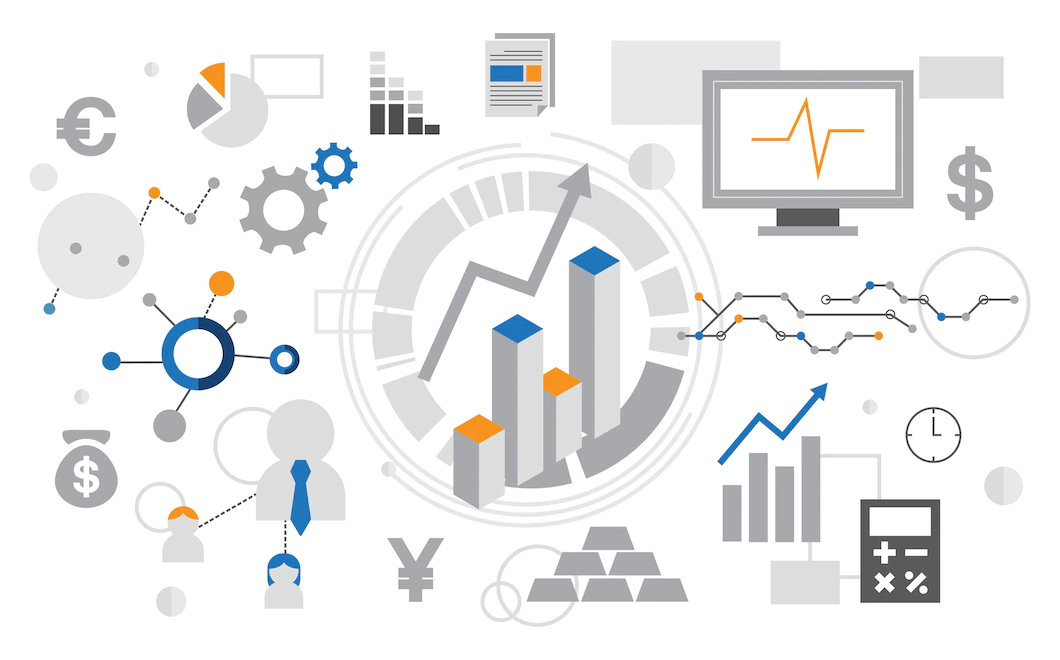

Employee performance for HR analytics can provide valuable insights to organizations in terms of employee engagement, productivity, and overall organizational effectiveness. HR analytics involves using data to make informed decisions about human resources and employee-related matters. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import pygwalker as pyg
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("uncleaned_emp.csv")

In [3]:
data = data.drop('employee_id', axis=1)
dataset = data.copy()

In [4]:
print("Duplicate Values =",data.duplicated().sum())
print('='*40)
print("The shape of the data: ", data.shape)

Duplicate Values = 18
The shape of the data:  (17417, 12)


In [5]:
missing = round(771 / 17417 * 100)
print(f'The percentage of education missing: {missing}%')

The percentage of education missing: 4%


In [6]:
missing = round(1363 / 17417 * 100)
print(f'The percentage of previous_year_rating missing: {missing}%')

The percentage of previous_year_rating missing: 8%


<AxesSubplot:>

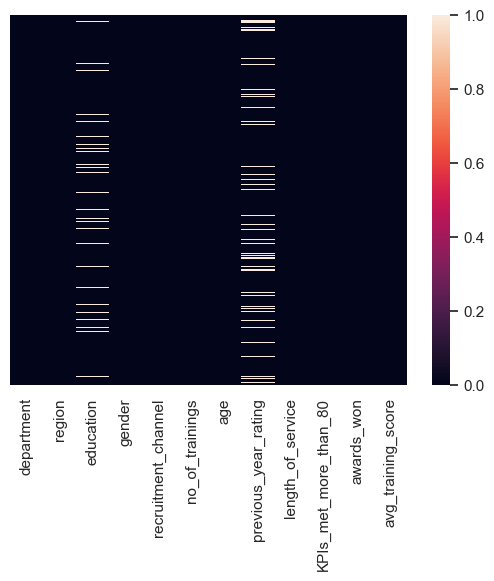

In [7]:
sns.heatmap(data.isnull(), yticklabels = False)

In [8]:
# Drop duplicates
data = data.drop_duplicates()

In [9]:
data.dropna(inplace = True)
# dropna to drop the null values

In [10]:
data.isnull().sum()

department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [11]:
print("Duplicate Values =",data.duplicated().sum())
print('='*40)
print("The shape of the data: ", data.shape)

Duplicate Values = 0
The shape of the data:  (15416, 12)


##### Treat region column

In [12]:
data['region'] = data['region'].str.extract('(\d+)')

In [13]:
# Convert 'region' to a numeric datatype
data['region'] = pd.to_numeric(data['region'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15416 entries, 1 to 17416
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             15416 non-null  object 
 1   region                 15416 non-null  int64  
 2   education              15416 non-null  object 
 3   gender                 15416 non-null  object 
 4   recruitment_channel    15416 non-null  object 
 5   no_of_trainings        15416 non-null  int64  
 6   age                    15416 non-null  int64  
 7   previous_year_rating   15416 non-null  float64
 8   length_of_service      15416 non-null  int64  
 9   KPIs_met_more_than_80  15416 non-null  int64  
 10  awards_won             15416 non-null  int64  
 11  avg_training_score     15416 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


## Data Visualization

#### Gender Distribution

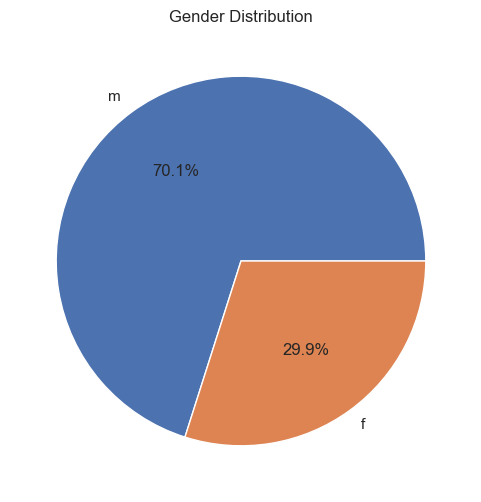

In [15]:
gender_counts = data['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))  # Increase the size if needed
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.show()

In [16]:
male_count = (data['gender'] == 'm').sum()
female_count = (data['gender'] == 'f').sum()

print(f'Total number of male employees: {male_count}')
print(f'Total number of female employees: {female_count}')

Total number of male employees: 10806
Total number of female employees: 4610


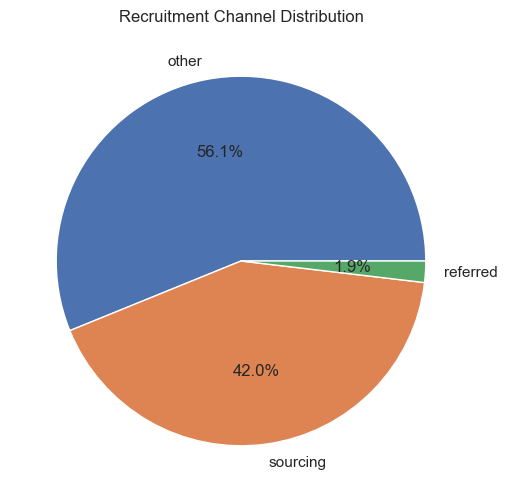

In [17]:
recruit_counts = data['recruitment_channel'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))  # Increase the size if needed
plt.pie(recruit_counts, labels = recruit_counts.index, autopct='%1.1f%%')

plt.title('Recruitment Channel Distribution')
plt.show()

In [18]:
sech_count = (data['education'] == 'Below Secondary').sum()
bach_count = (data['education'] == 'Bachelors').sum()
mact_count = (data['education'] == 'Masters & above').sum()

print(f'Educational level (Basic skills): {sech_count} employees')
print(f'Educational level (Bachelors): {bach_count} employees')
print(f'Educational level (Masters & Above): {mact_count} employees')

Educational level (Basic skills): 168 employees
Educational level (Bachelors): 10459 employees
Educational level (Masters & Above): 4789 employees


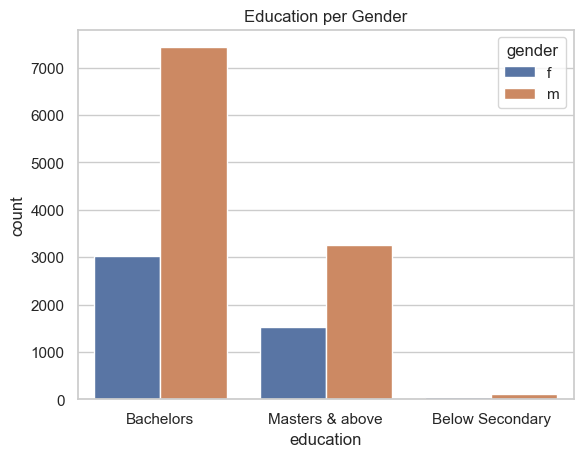

In [19]:
sns.countplot(data=data, x = data['education'], hue = data['gender'])
plt.title('Education per Gender')
plt.show()

#### KPI Rates

* 63.8% of the employees did not make up to 80 KPIs
* 36.2%of the employees did make up to 80 KPIs

In [20]:
KPI_counts = data['KPIs_met_more_than_80'].value_counts()
KPI_counts

0    9841
1    5575
Name: KPIs_met_more_than_80, dtype: int64

In [21]:
5575 - 4266

1309

In [22]:
no_goal = 9841
met_goal = 5575
more_no_kpi = 9841 - 5575
total_employees = 9841 + 5575
print(f"Original data: Total employees who met the 80 KPI mark {met_goal} and employees who did not meet the criteria {no_goal}. There are {more_no_kpi} more employees who did not meet the criteria than the employees who did.")

Original data: Total employees who met the 80 KPI mark 5575 and employees who did not meet the criteria 9841. There are 4266 more employees who did not meet the criteria than the employees who did.


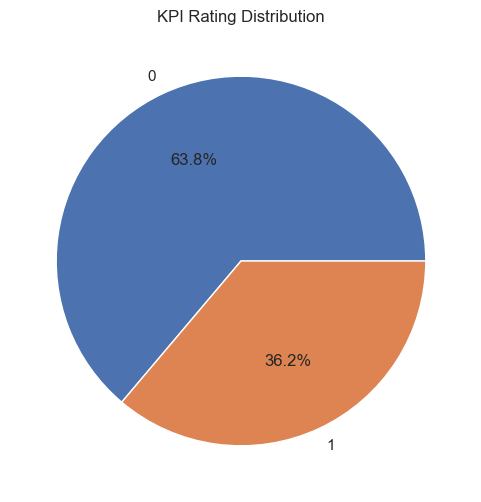

In [23]:
# Create the pie chart
plt.figure(figsize=(6,6))  # Increase the size if needed
plt.pie(KPI_counts, labels = KPI_counts.index, autopct='%1.1f%%')

plt.title('KPI Rating Distribution')
plt.show()

#### Average age

* Average age: 33

In [24]:
data["age"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
age,20.0,35.633044,34.0,60.0,7.576211,0.991874


<AxesSubplot:xlabel='age'>

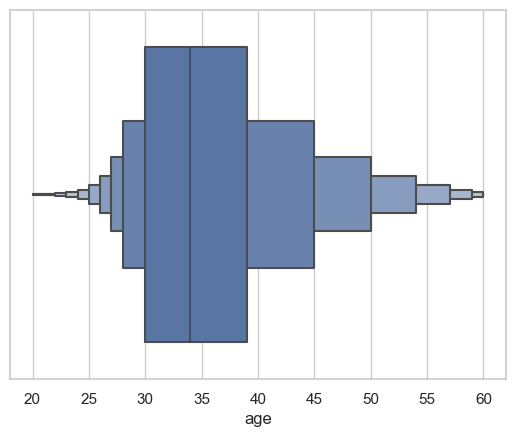

In [25]:
sns.boxenplot(x=data['age'])

#### Average length of service

* Average length of service: 5 years

In [26]:
data["length_of_service"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
length_of_service,1.0,6.258108,5.0,34.0,4.115144,1.751104


<AxesSubplot:xlabel='length_of_service'>

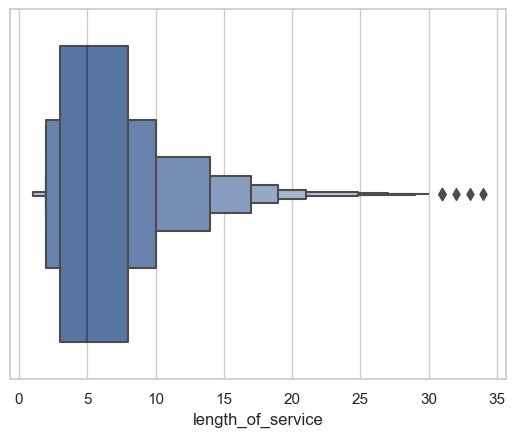

In [27]:
sns.boxenplot(x=data['length_of_service'])

#### Average Training

* Average Training count: 1

In [28]:
data["no_of_trainings"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
no_of_trainings,1.0,1.2476,1.0,9.0,0.588676,3.404001


<AxesSubplot:xlabel='no_of_trainings'>

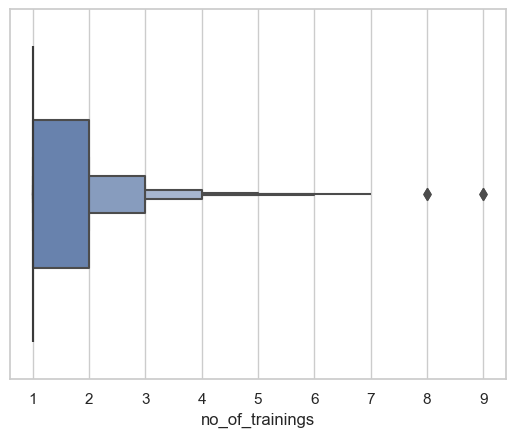

In [29]:
sns.boxenplot(x=data['no_of_trainings'])

##### Average Training Score

* Average training score: 60%

In [30]:
data["avg_training_score"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
avg_training_score,39.0,63.365919,60.0,99.0,13.300145,0.451742


<AxesSubplot:xlabel='avg_training_score'>

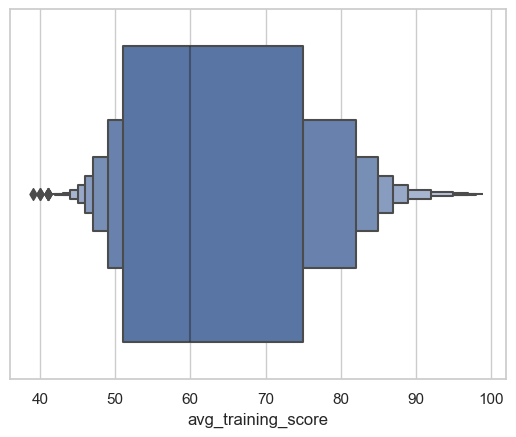

In [31]:
sns.boxenplot(x=data['avg_training_score'])

### Regions

In [32]:
data["region"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
region,1.0,14.226258,13.0,34.0,10.103566,0.219207


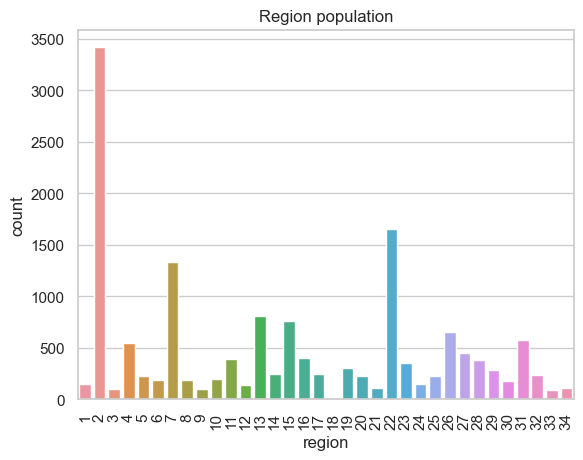

In [33]:
sns.countplot(data=data, x='region')
plt.xticks(rotation=90)
plt.title('Region population')
plt.show()

### Department

##### A total of 9 departments in the firm

Sales & Marketing, Opertions, Procurement, and Technology  departments have 2000 employees and above

Text(0.5, 1.0, 'Department popuation')

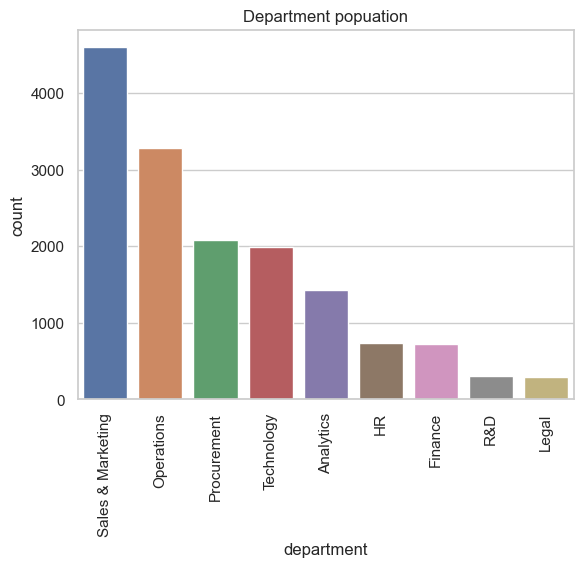

In [34]:
order = data['department'].value_counts().index
sns.countplot(data=data, x='department', order=order)
plt.xticks(rotation=90)
plt.title('Department popuation')

Text(0.5, 1.0, 'Avg training score per Department')

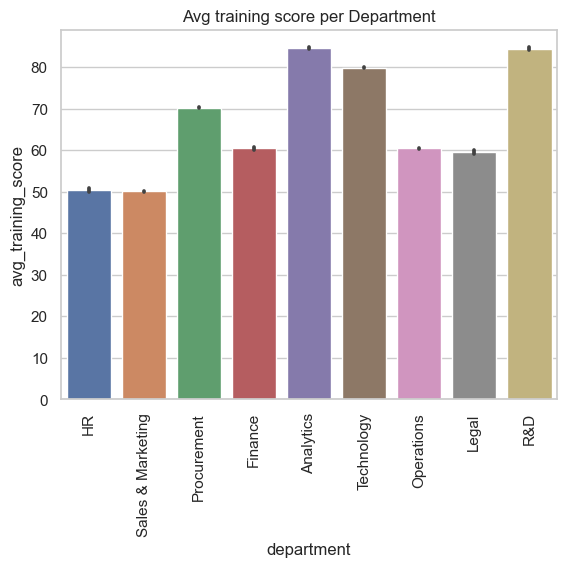

In [35]:
sns.barplot(data=data, x = 'department', y = 'avg_training_score')
plt.xticks(rotation=90)
plt.title('Avg training score per Department')

#### Training Score 

* HR and Sales & Marketing Departments are below the firm's average of 60%.
* Procurement, Analytics, Technology, R&D are above the firm's average of 60%.

In [36]:
data['KPIs_met_more_than_80'].value_counts()

0    9841
1    5575
Name: KPIs_met_more_than_80, dtype: int64

Text(0.5, 1.0, 'KPI rating per Department')

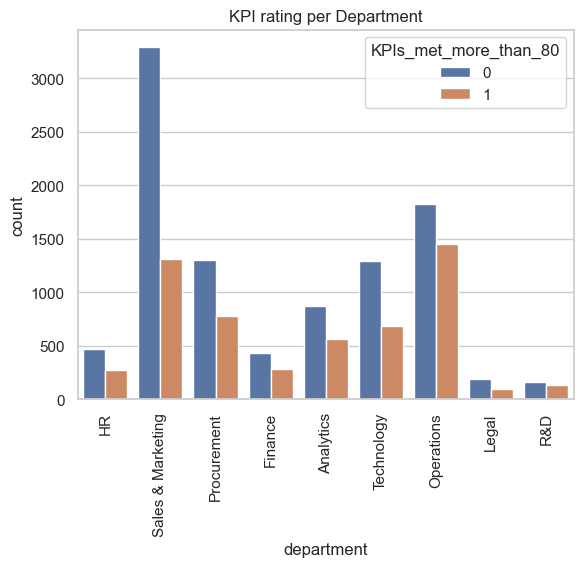

In [37]:
sns.countplot(data=data, x="department", hue="KPIs_met_more_than_80")
plt.xticks(rotation=90)
plt.title('KPI rating per Department')

#### Analzing Sales & Marketing department

In [38]:
# Group the data by 'department'
grouped = data.groupby('department')

# Get the rows where 'department' is 'Sales & Marketing'
sales_marketing_data = grouped.get_group('Sales & Marketing')

In [39]:
smale_count = (sales_marketing_data['gender'] == 'm').sum()
sfemale_count = (sales_marketing_data['gender'] == 'f').sum()

print(f'Total number of male employees in Sales/Marketing: {smale_count}')
print(f'Total number of female employees in Sales/Marketing: {sfemale_count}')

Total number of male employees in Sales/Marketing: 3711
Total number of female employees in Sales/Marketing: 888


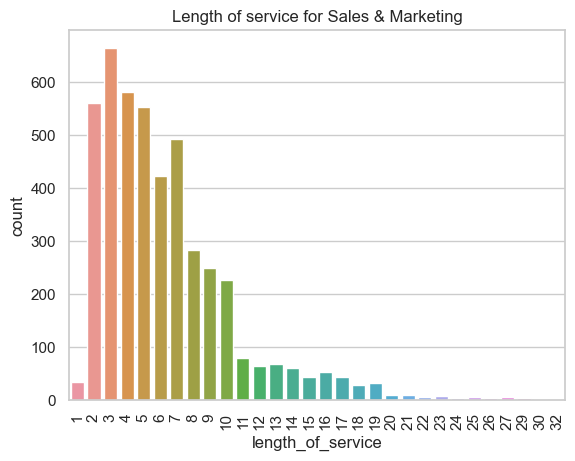

In [40]:
sns.countplot(data = sales_marketing_data, x='length_of_service')
plt.xticks(rotation=90)
plt.title('Length of service for Sales & Marketing')
plt.show()

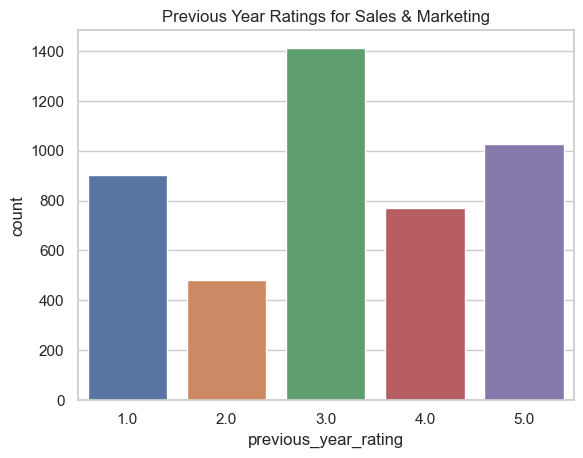

In [41]:
sns.countplot(data = sales_marketing_data, x='previous_year_rating')
plt.title('Previous Year Ratings for Sales & Marketing')
plt.show()

#### Employees awards

* Gender
* Age

In [42]:
# Group the data by 'awards_won'
grouped = data.groupby('awards_won')

# Get the rows where awards were won in 'awards_won'
award_won_data = grouped.get_group(1)

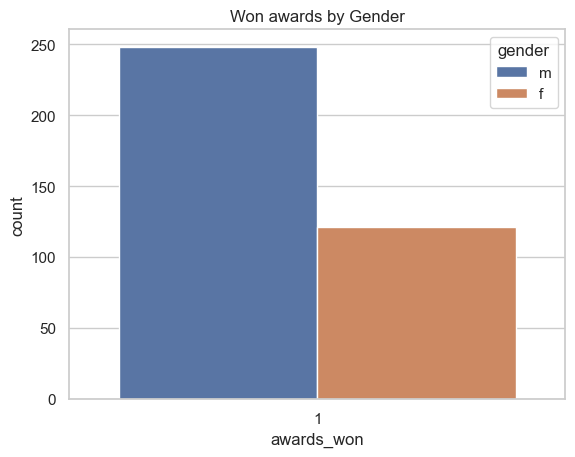

In [43]:
sns.countplot(data = award_won_data, x='awards_won', hue = 'gender')
plt.title('Won awards by Gender')
plt.show()

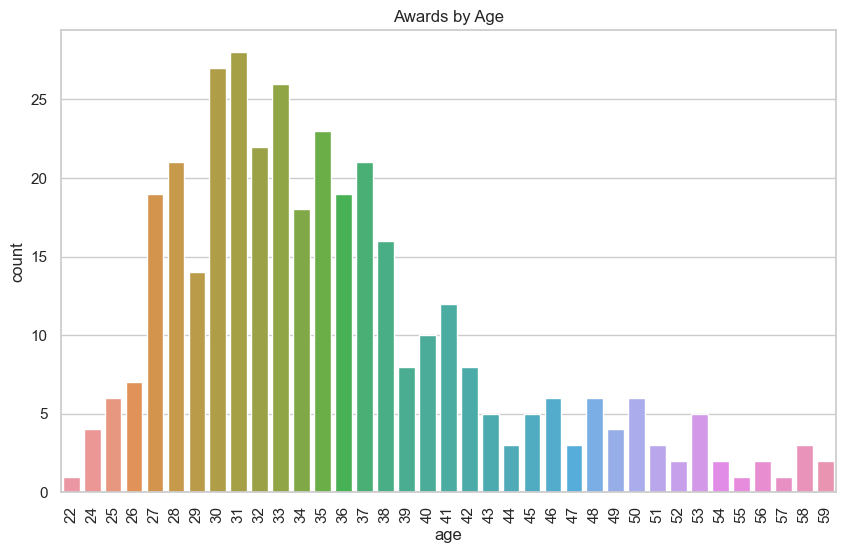

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data = award_won_data, x='age')
plt.xticks(rotation=90)
plt.title('Awards by Age')
plt.show()

#### Employees KPIs achievement

* Gender
* Age

In [45]:
# Group the data by 'awards_won'
grouped = data.groupby('KPIs_met_more_than_80')

# Get the rows where awards were won in 'awards_won'
kpi_data = grouped.get_group(1)

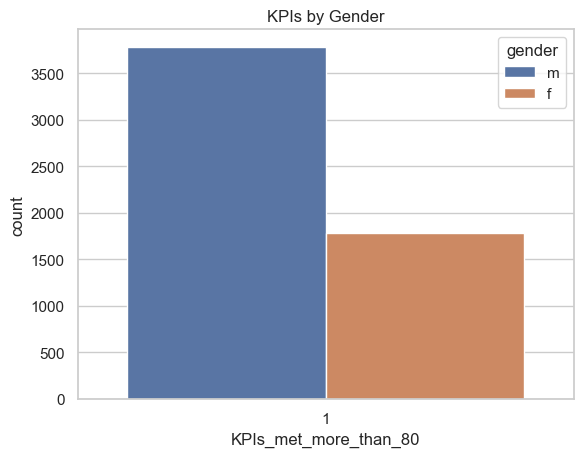

In [46]:
sns.countplot(data = kpi_data, x='KPIs_met_more_than_80', hue = 'gender')
plt.title('KPIs by Gender')
plt.show()

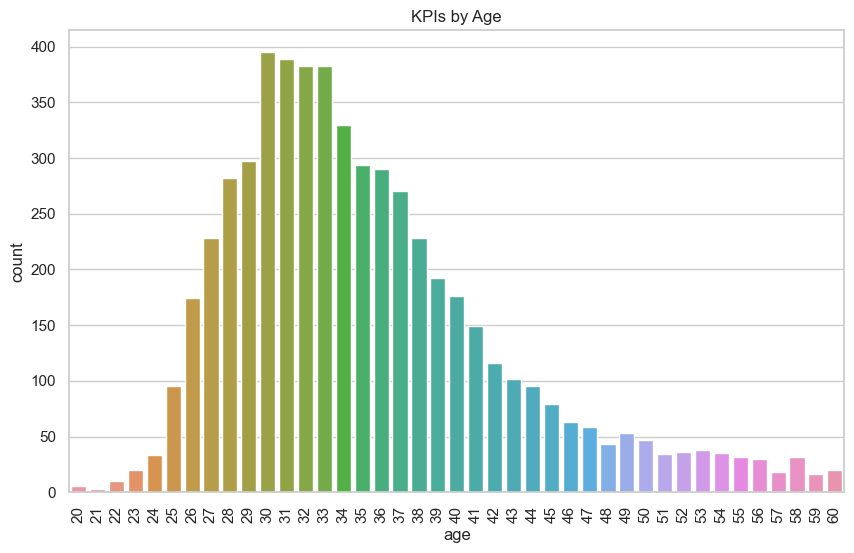

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data = kpi_data, x='age')
plt.xticks(rotation=90)
plt.title('KPIs by Age')
plt.show()

### Frequency distribution

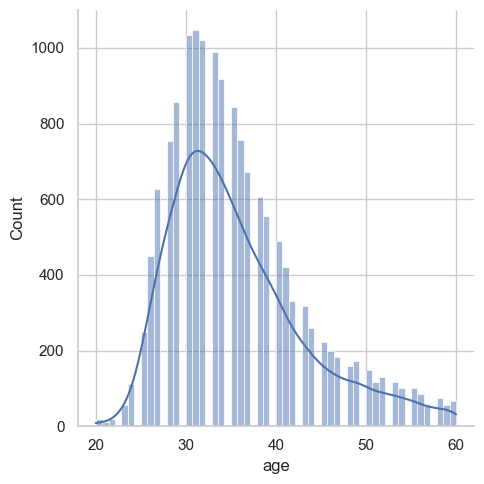

In [48]:
sns.displot(data=data, x='age', kde=True)

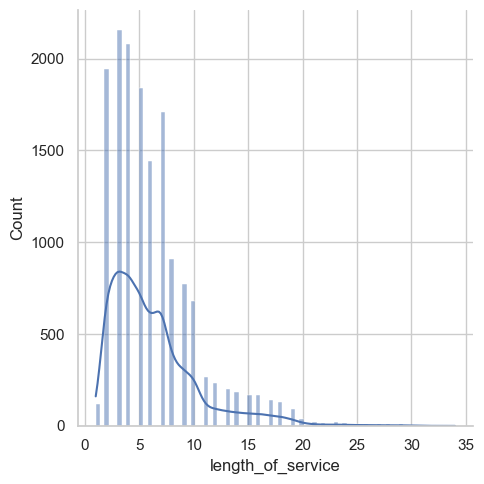

In [49]:
sns.displot(data=data, x='length_of_service', kde=True)

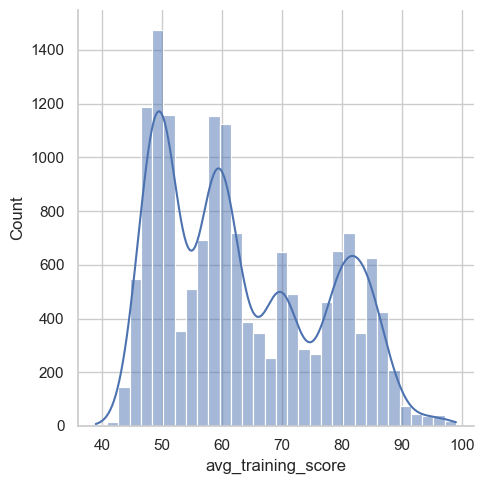

In [50]:
sns.displot(data=data, x='avg_training_score', kde=True)

<Figure size 1000x600 with 0 Axes>

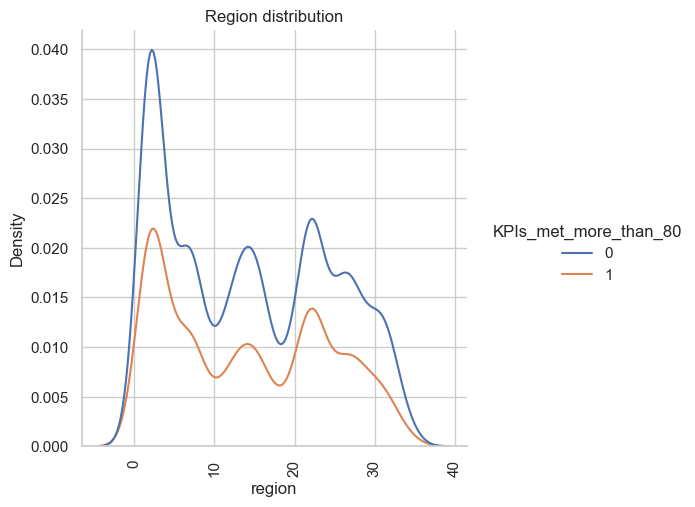

In [51]:
plt.figure(figsize=(10,6)) 
sns.displot(data=data, x='region', kind="kde", hue = 'KPIs_met_more_than_80')
plt.xticks(rotation=90)
plt.title('Region distribution')
plt.show()

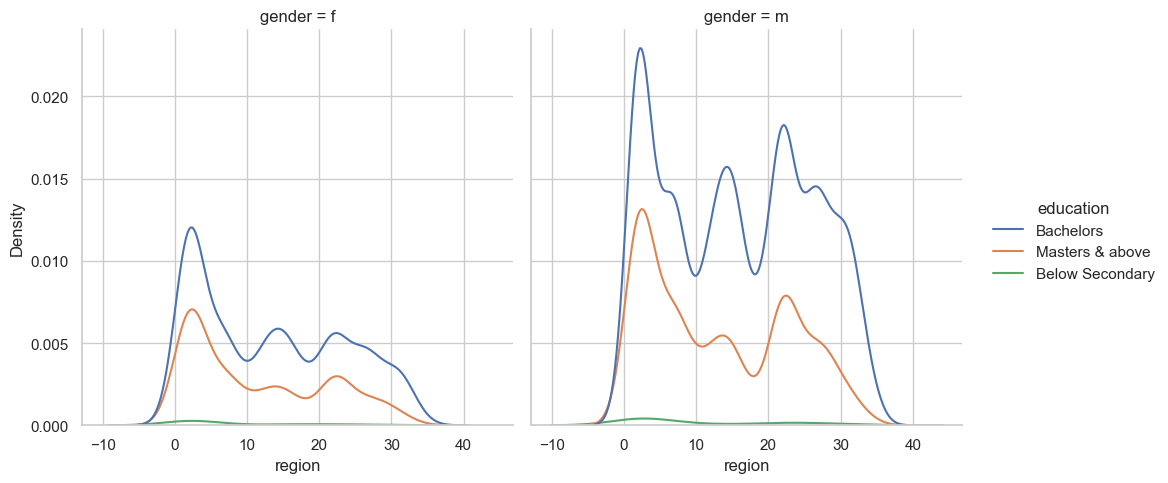

In [52]:
sns.displot(data=data, x="region", hue="education", col="gender", kind="kde")

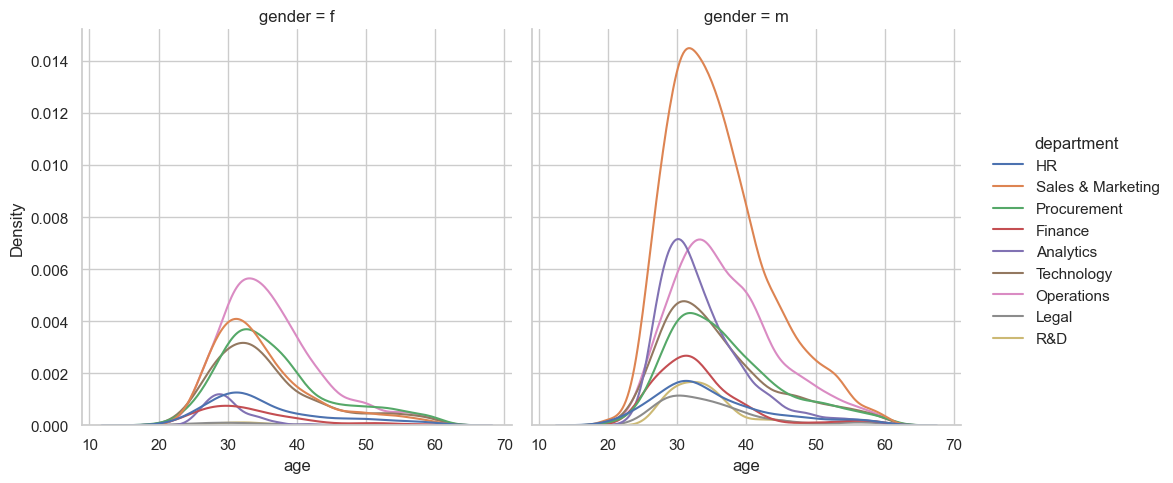

In [53]:
sns.displot(data=data, x="age", hue="department", col="gender", kind="kde")

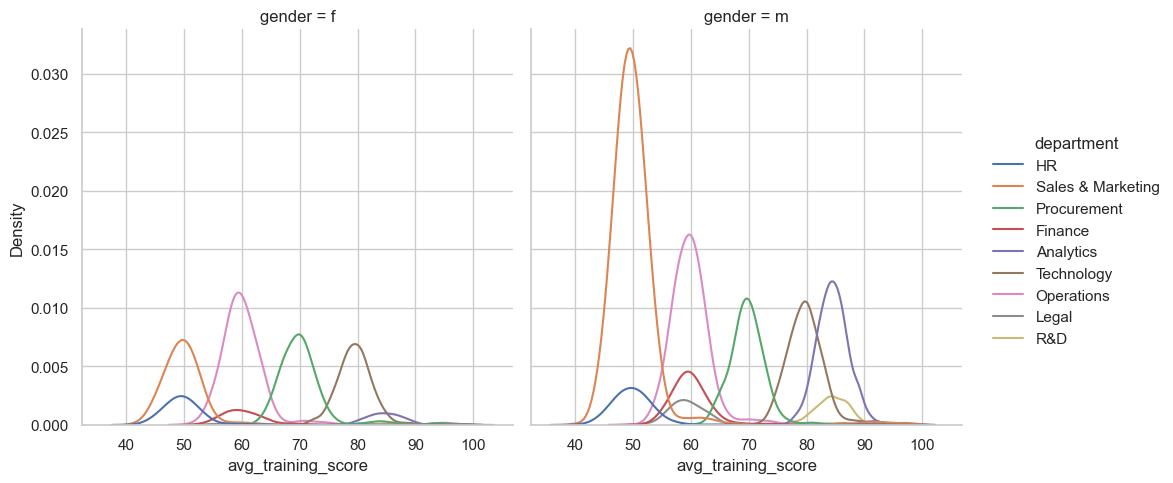

In [54]:
sns.displot(data=data, x="avg_training_score", hue="department", col="gender", kind="kde")

<AxesSubplot:xlabel='length_of_service', ylabel='age'>

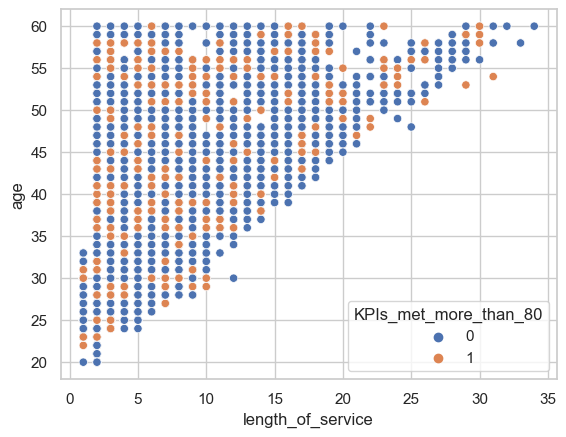

In [55]:
sns.scatterplot(data=data, x = 'length_of_service', y = 'age', hue = 'KPIs_met_more_than_80')

<AxesSubplot:xlabel='age', ylabel='length_of_service'>

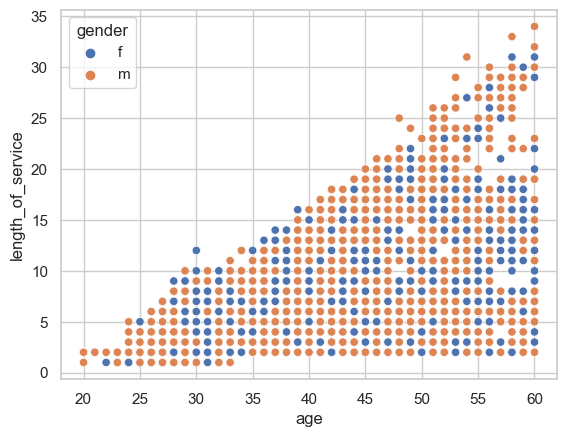

In [56]:
sns.scatterplot(data=data, x = 'age', y = 'length_of_service', hue = 'gender')

<AxesSubplot:xlabel='avg_training_score', ylabel='length_of_service'>

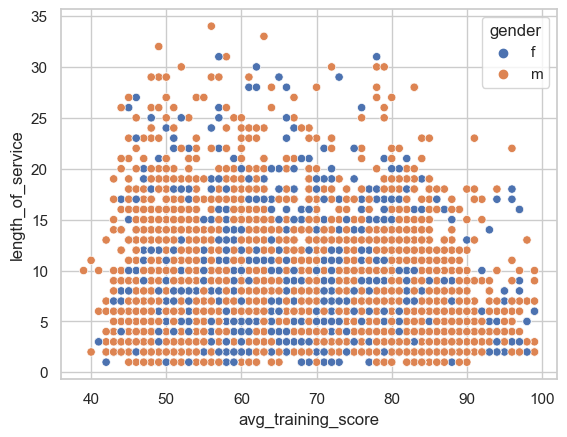

In [57]:
sns.scatterplot(data=data, x = 'avg_training_score', y = 'length_of_service', hue = 'gender')

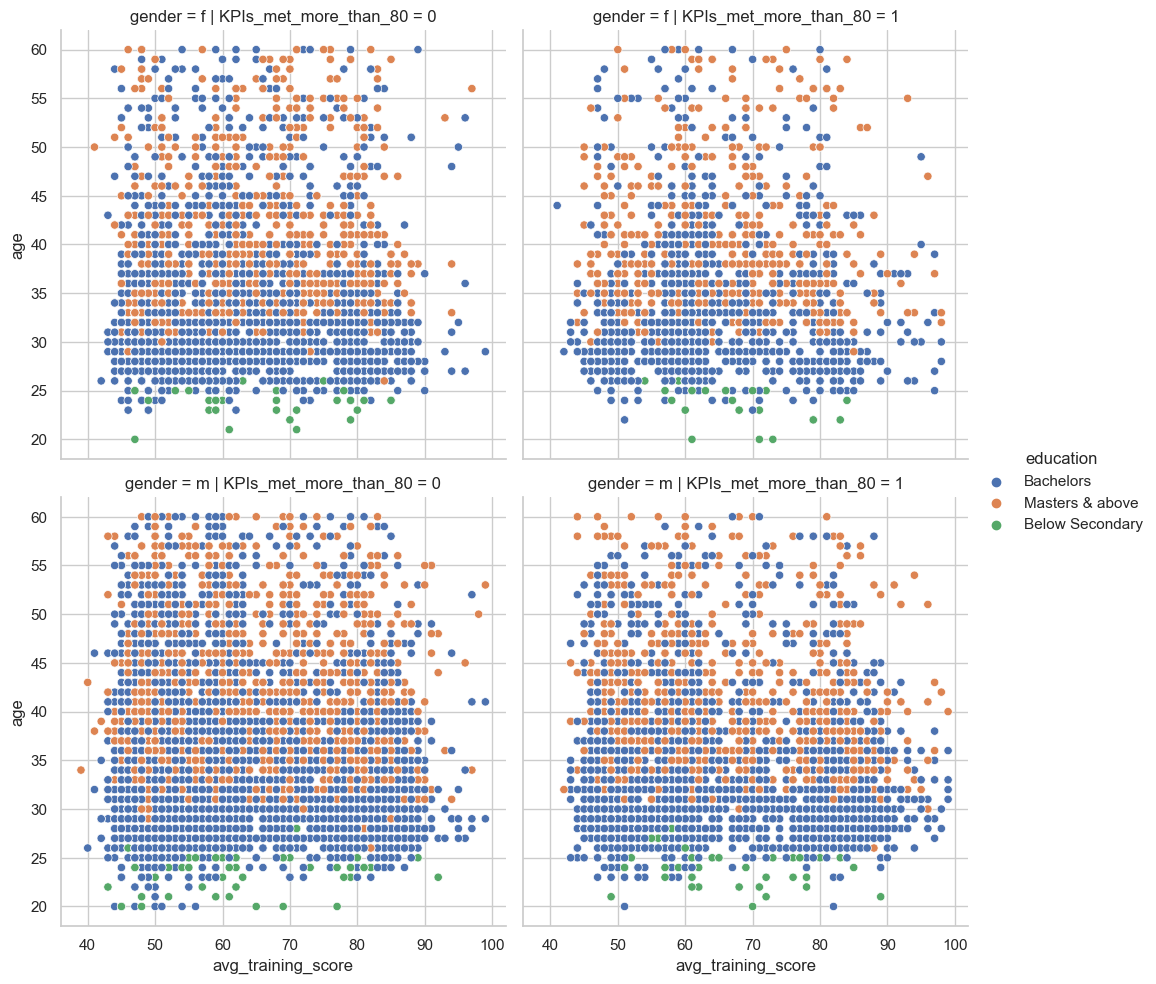

In [58]:
sns.relplot(data=data, x="avg_training_score", y="age", hue="education", col="KPIs_met_more_than_80", row="gender")

### Correlation Matrix

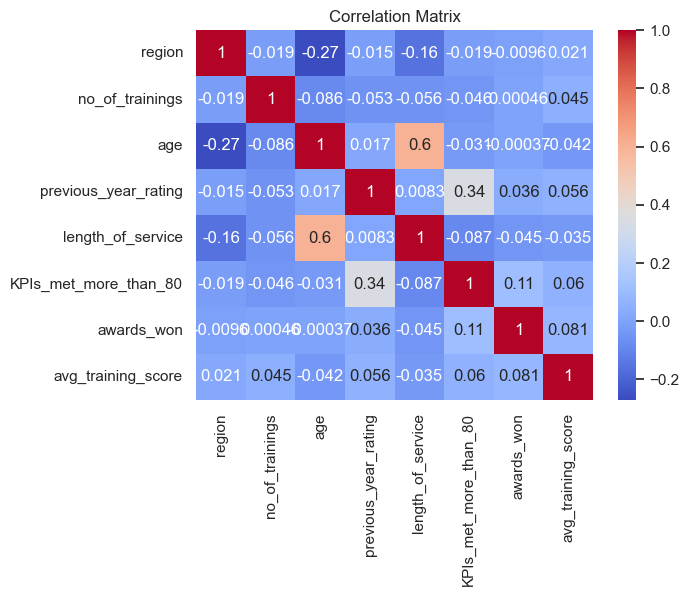

In [59]:
# Heatmap: Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### The 'Age' and 'Length of service' have the strongest correlation 64%, then 'Previous year rating' and 'KPI met more than 80' at second place with 34%. 

## Data preprocessing

In [60]:
df = data.copy()
df = df.drop(['department', 'recruitment_channel'], axis=1)

#### Label Encoder

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Transform dependent variable to Binary using LabelEncoder

In [62]:
df.head()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,4,Bachelors,0,1,31,3.0,5,0,0,51
2,13,Bachelors,1,1,31,1.0,4,0,0,47
3,2,Bachelors,0,3,31,2.0,9,0,0,65
4,29,Bachelors,1,1,30,4.0,7,0,0,61
5,7,Bachelors,1,1,36,3.0,2,0,0,68


### Split into Independent and Dependent variables

In [63]:
X = df.drop('KPIs_met_more_than_80', axis=1).values
y = df['KPIs_met_more_than_80'].values

#### Column Transformer

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

#### Feature Selection

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression

# Replace 'feature1', 'feature2', ..., 'featureN' with the actual feature names
feature_names = ['region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']

# Create the SelectKBest object with f_regression scoring and k=8
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# Get the transformed feature matrix with only the selected top 5 features
X_selected = selector.transform(X)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original feature_names list
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Top selected feature names:")
print(selected_feature_names)

Top selected feature names:
['age', 'length_of_service', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']


### Split into Training set and Test set

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Applying Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification model

In [68]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [69]:
y_pred = classifier_lg.predict(X_test)

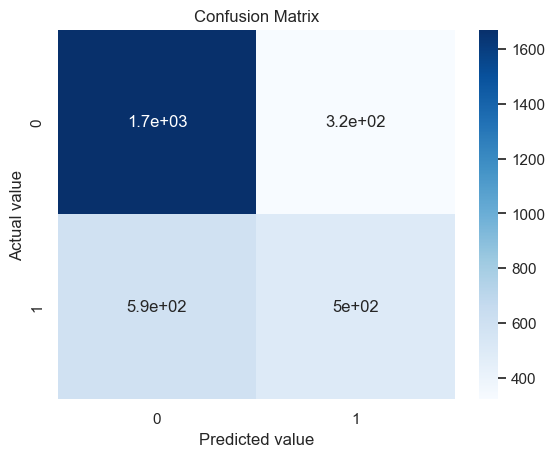

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy, precision, recall and f1_score
accuracy_lg = accuracy_score(y_test, y_pred)*100
precision_lg = precision_score(y_test, y_pred)*100
score_lg = f1_score(y_test, y_pred)*100
recall_lg = recall_score(y_test, y_pred)*100

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set labels and title
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

### Logistic Regression (Precision recall curve)

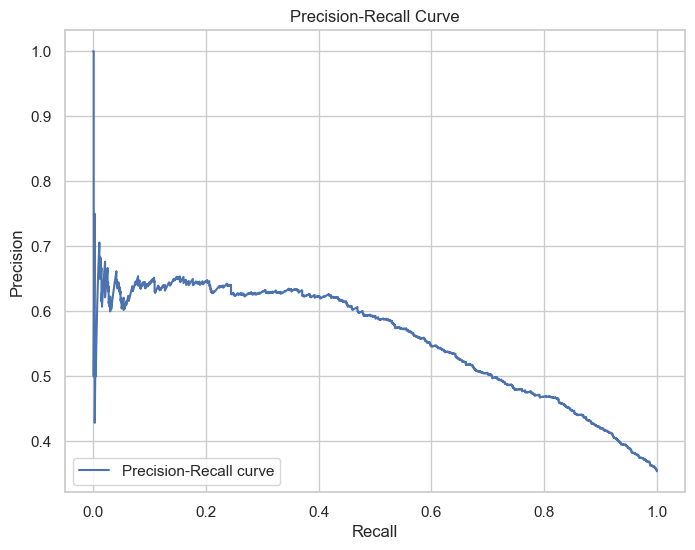

In [71]:
from sklearn.metrics import precision_recall_curve

# Suppose you have your model (lg) and your data (X_test, y_test)
y_scores = classifier_lg.predict_proba(X_test)[:, 1]  # get the probability estimates of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Stacking Model

In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Base estimators
base_learners = [
                 ('rf_1', DecisionTreeClassifier()),
                 ('rf_2', SVC())             
                ]

# Meta model
logreg = LogisticRegression()

# Stacking classifier
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=logreg)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

# calculate accuracy, precision, recall and f1_score
accuracy_stack = accuracy_score(y_test, y_pred_stack)*100
precision_stack = precision_score(y_test, y_pred_stack)*100
score_stack = f1_score(y_test, y_pred_stack)*100
recall_stack = recall_score(y_test, y_pred_stack)*100

In [73]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final["Stack Predicted"] = y_pred_stack

### Stacking Model Evaluation (Receiver Operating Characteristic Curve)

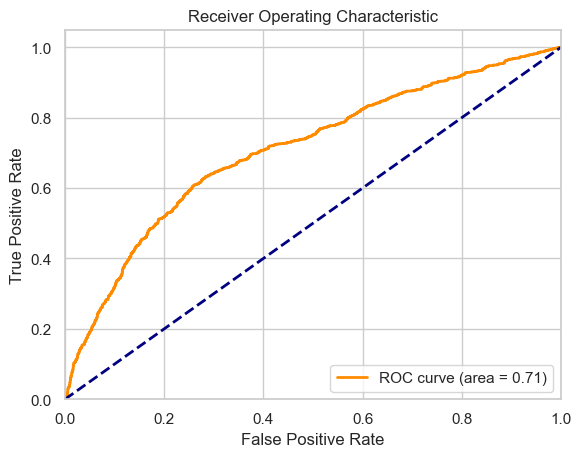

In [74]:
from sklearn.metrics import roc_curve, auc

# Fit the model on the training data
stack_clf.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_prob = stack_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic regression (K-Fold Cross Validation)

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lg, X = X_train, y = y_train, cv = 10) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.03 %
Standard Deviation: 1.29 %


### Evaculation of Models

In [76]:
# Define the model names and accuracy values
model_names = ['Logistic Regression', 'Stack: Logistic Regression']
accuracy_values = [accuracy_lg, accuracy_stack]
precision_values = [precision_lg, precision_stack]
f1_score_values = [score_lg, score_stack]
recall_values = [recall_lg, recall_stack]

# Create a dictionary with the data
data = {'Model': model_names,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'f1_score': f1_score_values}

# Create the DataFrame
df = pd.DataFrame(data)

In [77]:
df

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression,70.298314,60.731707,45.604396,52.092050
1,Stack: Logistic Regression,70.719844,62.483487,43.315018,51.162791


#### Accutate vs Predicted

In [78]:
final

,Acctuate,Predicted,Stack Predicted
0,0,0,0
1,0,1,1
2,1,0,0
3,1,1,1
4,0,0,0
...,...,...,...
3079,0,0,0
3080,1,1,1
3081,0,0,0
3082,0,0,0
